# Coefficients of variation across topics

Which topics mostly reflect differences within books, and which ones differences between books?

In [30]:
import sys, csv, math
import numpy as np
import pandas as pd
from matplotlib import pyplot 
%matplotlib inline

In [2]:
# A useful function

def getdoc(anid):
    '''
    Gets the docid part of a character id
    '''

    if '|' in anid:
        thedoc = anid.split('|')[0]
    else:
        print('error', anid)
        thedoc = anid

    return thedoc

In [3]:
# Initialize some variables

# We're going to do this for a 200-topic model.

doctopic_path = '../fic200/fic200_doctopics.txt'
veclen = 200

# Two variables that will hold a list of CVs and means 
# for each topic. Each item in the list represents a
# coefficient of variation, or a mean, for a different
# document.

doc_cvs = dict()
doc_means= dict()

for i in range(veclen):
    doc_means[i] = []
    doc_cvs[i] = []


Now we actually loop through the doctopic matrix measuring the mean and standard deviation of each topic in each book.

In [6]:
names = ['theindex', 'charid']
names.extend(["topic" + str(x) for x in range (200)])
dtm = pd.read_csv(doctopic_path, sep = '\t', names = names)

In [7]:
dtm.columns

Index(['theindex', 'charid', 'topic0', 'topic1', 'topic2', 'topic3', 'topic4',
       'topic5', 'topic6', 'topic7',
       ...
       'topic190', 'topic191', 'topic192', 'topic193', 'topic194', 'topic195',
       'topic196', 'topic197', 'topic198', 'topic199'],
      dtype='object', length=202)

In [8]:
dtm = dtm.assign(docid = dtm.charid.map(getdoc))

In [9]:
groupedbydoc = dtm.groupby('docid')
singletons = 0

for doc, group in groupedbydoc:
    for i in range(veclen):
        if len(group) > 1:
            the_mean = np.mean(group['topic' + str(i)])
            the_std = np.std(group['topic' + str(i)])
            the_cv = the_std/the_mean
        else:
            the_mean = 0
            the_std = 0
            the_cv = 0
            singletons += 1
        doc_cvs[i].append(the_cv)
        doc_means[i].append(the_mean)

print(singletons/veclen, " single-char vols.")

33000  single-char vols.


In [59]:
mean_cv_withinbook = dict()
cv_acrossbook = dict()
mean_acrossbook = dict()

for i in range(veclen):
    mean_acrossbook[i] = np.mean(doc_means[i])
    mask = np.array(doc_means[i]) > mean_acrossbook[i] / 8
    mean_cv_withinbook[i] = np.mean(np.array(doc_cvs[i])[mask])
    cv_acrossbook[i] = np.std(doc_means[i]) / mean_acrossbook[i]

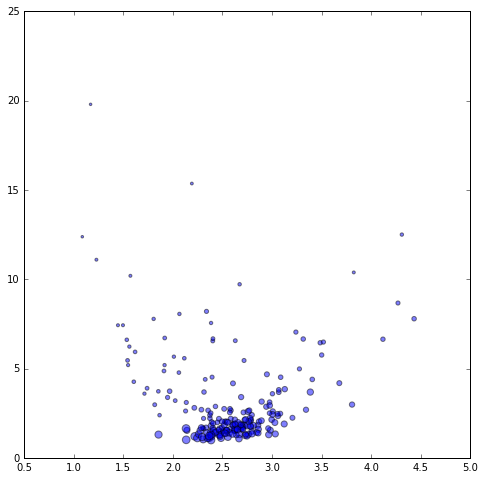

In [60]:
x = [mean_cv_withinbook[x] for x in range(veclen)]
y = [cv_acrossbook[x] for x in range(veclen)]
sizes = [math.sqrt(mean_acrossbook[x] * 200000) for x in range(veclen)]
fig, ax = pyplot.subplots(figsize = (8, 8))
pyplot.scatter(x, y, s = sizes, alpha = 0.5)
# ax.set_ylim(0, 8)
# ax.set_xlim(1.4, 3)
pyplot.show()

In [38]:
keypath = '../fic200/fic200_keys.txt'

keys = []
boring = {'said', 'had', 'was'}

with open(keypath, encoding = 'utf-8') as f:
    for line in f:
        fields = line.strip().split('\t')
        text = fields[2]
        words = text.split()[1 : ]
        interestingwords = []
        for w in words:
            if w not in boring:
                interestingwords.append(w)
            if len(interestingwords) > 20:
                break
        keys.append(interestingwords)

keys = [' '.join(x) for x in keys]

In [58]:
tuples = []
for i in range(veclen):
    if mean_cv_withinbook[i] > 2.7:
        tuples.append((mean_cv_withinbook[i], cv_acrossbook[i], i, keys[i]))

tuples.sort()
tuples

[(2.7286749585323635,
  12.501275059702161,
  199,
  'said-ya ass said-ah mouth said-ta body prick cunt legs said-dont said-fuck tongue dick balls penis thighs pants lips crotch hips said-want'),
 (2.7296534476113128,
  1.3840219394168762,
  155,
  'room lay face bed head illness life was-see health hand death is seemed mind condition died fell die was-left strength side'),
 (2.7310885485109333,
  2.341861825355644,
  101,
  'work book written life read writing letter write letters writes books works stories pen story poems says novel name journal diary'),
 (2.7335712133197547,
  1.6529445562119081,
  154,
  'head hat shop hand man coat nose mouth took eyes hands cane face chair wore pocket spectacles legs eye stick wife'),
 (2.7607291334259023,
  1.9746377158352222,
  127,
  'sent court people son power palace life brother enemies country hand father highness subjects master ordered made gave king friends death'),
 (2.7880141203939943,
  1.5433753335669851,
  152,
  'loved was-loved l

In [40]:
keys[1]

'made wanted knew have did seemed decided man life began way work gave told able needed called took tried voice done'